# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')#mnist 손글씨 데이터를 불러옵니다


c:\Users\Jiwoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X=mnist.data

In [4]:
y=mnist.target

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [5]:
print(X.shape, y.shape)

(70000, 784) (70000,)


In [6]:
np.array(X)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(np.array(X),columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [9]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


<Figure size 640x480 with 0 Axes>

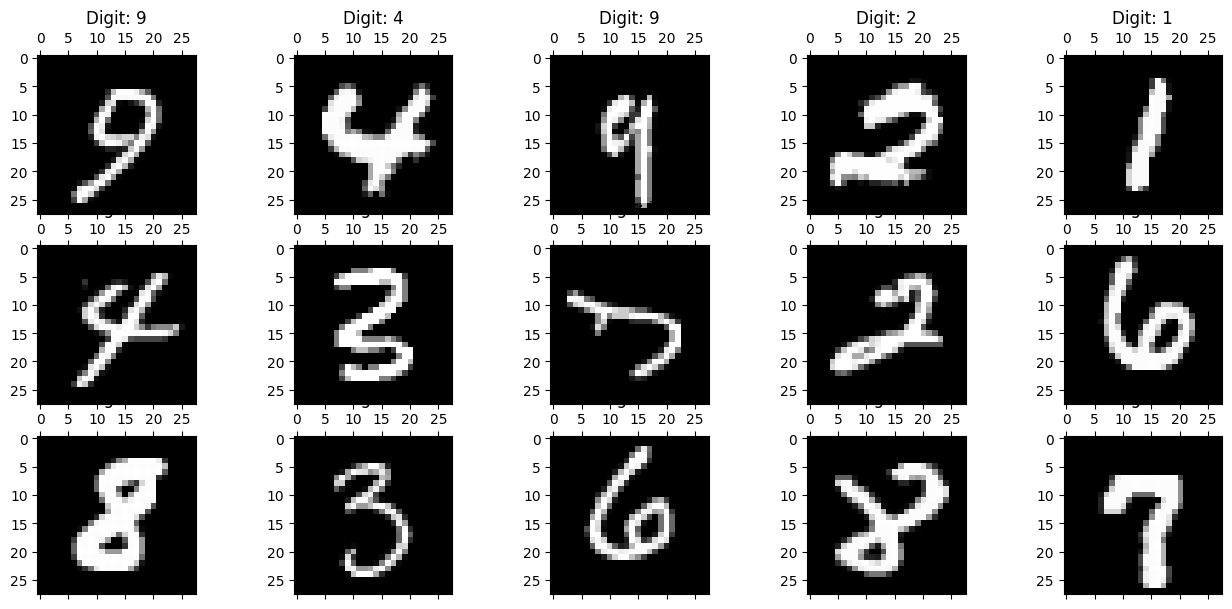

In [10]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])
rndperm=rndperm

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [12]:
from sklearn.decomposition import PCA
for i in range(1, 10):
    pca = PCA(n_components=i)
    pca.fit(X)
    print("n_components = ", i, "Explained Variance Ratio = ", pca.explained_variance_ratio_)
    print("n_components = ", i, "total Variance Ratio = ", pca.explained_variance_ratio_.sum())


n_components =  1 Explained Variance Ratio =  [0.09746116]
n_components =  1 total Variance Ratio =  0.09746115920337553
n_components =  2 Explained Variance Ratio =  [0.09746116 0.07155445]
n_components =  2 total Variance Ratio =  0.16901560499035542
n_components =  3 Explained Variance Ratio =  [0.09746116 0.07155445 0.06149531]
n_components =  3 total Variance Ratio =  0.23051091475921254
n_components =  4 Explained Variance Ratio =  [0.09746116 0.07155445 0.06149531 0.05403385]
n_components =  4 total Variance Ratio =  0.28454475836038196
n_components =  5 Explained Variance Ratio =  [0.09746116 0.07155445 0.06149531 0.05403385 0.04888934]
n_components =  5 total Variance Ratio =  0.3334340967339409
n_components =  6 Explained Variance Ratio =  [0.09746116 0.07155445 0.06149531 0.05403385 0.04888934 0.04305227]
n_components =  6 total Variance Ratio =  0.37648636555822323
n_components =  7 Explained Variance Ratio =  [0.09746116 0.07155445 0.06149531 0.05403385 0.04888934 0.043052

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=2)

In [14]:
lda.transform(X_train)

array([[-2.59088163, -0.70326871],
       [-2.35271829, -2.84762456],
       [-3.47369451, -2.36779956],
       ...,
       [-1.92331335, -2.47413578],
       [ 2.58649732, -1.46901962],
       [-2.90055046, -1.06667786]])

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

## model1 Random Forest

### 원본데이터에 적용

In [15]:
#import RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model1=RandomForestClassifier(n_estimators=100,random_state=0,max_depth=2)
model1.fit(X_train,y_train)
model1_pred=model1.predict(X_test)
model1_acc=accuracy_score(y_test,model1_pred)

In [16]:
print(model1_acc)

0.6382857142857142


In [21]:
pca=PCA(n_components=30)
pca.fit(X_train)
pca_train=pca.transform(X_train)
pca_test=pca.transform(X_test)

model1.fit(pca_train,y_train)
y_pred=model1.predict(pca_test)
print("랜덤포레스트 : ",accuracy_score(y_test,y_pred))

랜덤포레스트 :  0.6663571428571429


In [22]:
lda=LinearDiscriminantAnalysis(n_components=3)
lda.fit(X_train,y_train)
X_train_lda=lda.transform(X_train)
X_test_lda=lda.transform(X_test)
model1.fit(X_train_lda,y_train)
y_pred=model1.predict(X_test_lda)
print("선형판별분석 :",accuracy_score(y_test,y_pred))

선형판별분석 : 0.5983571428571428


## model2 logistic regression

### 원본 데이터 

In [23]:
# import logistic regression
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
print("로지스틱회귀 : ",accuracy_score(y_test,y_pred2))

로지스틱회귀 :  0.9220714285714285


c:\Users\Jiwoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### pca

In [24]:
model2.fit(pca_train, y_train)
y_pred2 = model2.predict(pca_test)
print("로지스틱회귀 : ", accuracy_score(y_test, y_pred2))

로지스틱회귀 :  0.8962142857142857


c:\Users\Jiwoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### lda

In [25]:
model2.fit(X_train_lda, y_train)
y_pred = model2.predict(X_test_lda)
print('정확도 : %.2f' % accuracy_score(y_test, y_pred))

정확도 : 0.74
